# Model training
The notebook is used to train the GNN model using a specific dataset. We have implemented the GNN model and all it's related functions in a folder called ExplanationEvaluation.

In [18]:
"""
Import all necessary libraries and python files
"""
from ExplanationEvaluation.configs.selector import Selector
from ExplanationEvaluation.tasks.training import train_node
import torch
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [19]:
"""
To incorporate different settings for different datasets we create a JSON of all arguments with respect to a particular dataset and use them throughout the program
"""
_dataset = 'cora'  #Twitch, cora
config_path = f"./ExplanationEvaluation/configs/replication/models/model_gnn_{_dataset}.json"
config = Selector(config_path)

In [20]:
# Set the seed and all other settings related to Torch library here
config = Selector(config_path).args
torch.manual_seed(config.model.seed)
torch.cuda.manual_seed(config.model.seed)
np.random.seed(config.model.seed)

In [21]:
"""
Train the GNN model using the arguments defined in the JSON

Raises:
    NotImplementedError: Since any other models have not been trained if the user tries to train a model which is not incorporated in this project the block raises an error
"""
_dataset = config.model.dataset
_explainer = config.model.paper

if _dataset =="Twitch" or _dataset == "cora":
    history = train_node(_dataset, _explainer, config.model)
else:
    raise NotImplementedError

Loading Twitch dataset
NodeGCN(
  (conv1): GCNConv(128, 20)
  (relu1): ReLU()
  (conv2): GCNConv(20, 20)
  (relu2): ReLU()
  (conv3): GCNConv(20, 20)
  (relu3): ReLU()
  (lin): Linear(in_features=60, out_features=2, bias=True)
)


100%|██████████| 1000/1000 [01:10<00:00, 14.17it/s]

final train_acc:0.7395630120952009, val_acc: 0.7407407407407407, test_acc: 0.7396363636363636


In [22]:
def update(x):
    """_summary_

    Args:
        x (tensor): Loss value at a particular iteration

    Returns:
        _type_: Returns a number for loss value
    """
    return x.detach().numpy().tolist()

In [23]:
history["Training Loss"] = history["Training Loss"].apply(update)

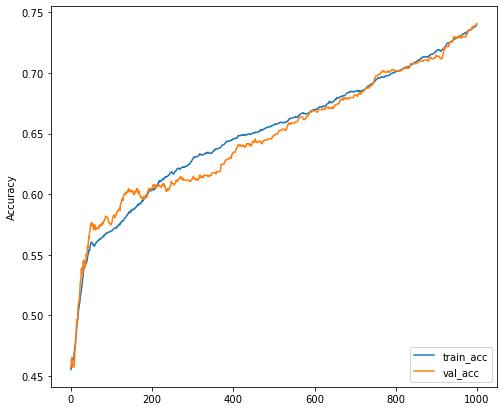

In [24]:
"""
    Visualize the Accuracy of the model
"""
rcParams['figure.figsize'] = 8, 7
plt.plot(history['Train Accuracy'], label='train_acc')
plt.plot(history['Validation Accuracy'], label = 'val_acc')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

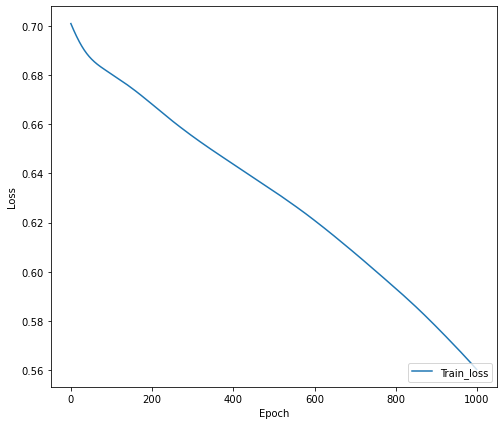

In [25]:
"""
Visualize the loss of the model
"""
plt.plot(history["Training Loss"], label = "Train_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()